# 7.1節

## 実践２０

リスト 7.1

In [1]:
import matplotlib.pyplot as plt, numpy as np, math
import pandas as pd

imported_data = pd.read_csv('http://www.rokakuho.co.jp/data/books/0172/chapter7.csv')
imported_data = imported_data.values

x_data = imported_data[:, 1] 
delta_data = imported_data[:, 2] 

リスト 7.2

In [2]:
def kernel_func(x1, x2):
    x1d = np.array([1, np.log(x1-0.035)**3, np.log(1.01-x1)**3]) 
    x2d = np.array([1, np.log(x2-0.035)**3, np.log(1.01-x2)**3])
    return x1d @ x2d

def kernel_matrix(x1, x2):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j])
    return K

x_data = x_data.reshape(-1, 1)
K = kernel_matrix(x_data, x_data)
c = np.linalg.pinv(K) @ delta_data

<ipython-input-2-86b661ed5970>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x1d = np.array([1, np.log(x1-0.035)**3, np.log(1.01-x1)**3])
<ipython-input-2-86b661ed5970>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x2d = np.array([1, np.log(x2-0.035)**3, np.log(1.01-x2)**3])


リスト 7.3

<ipython-input-2-86b661ed5970>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x1d = np.array([1, np.log(x1-0.035)**3, np.log(1.01-x1)**3])
<ipython-input-2-86b661ed5970>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x2d = np.array([1, np.log(x2-0.035)**3, np.log(1.01-x2)**3])


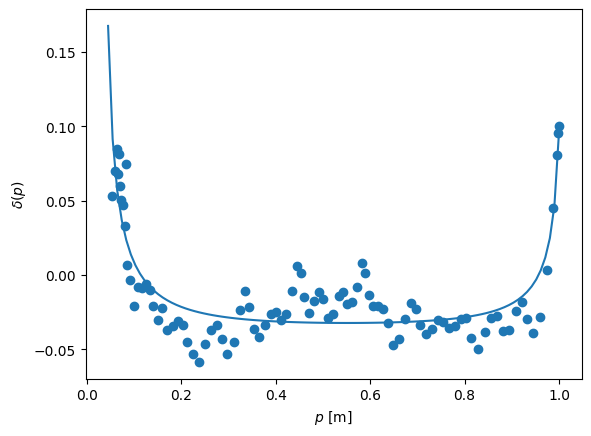

(Text(0.5, 28.0, '$p$ [m]'), Text(28.0, 0.5, '$\\delta(p)$'), None)

In [3]:
x = np.linspace(0.045, 1.0, 100)
k_s = kernel_matrix(x.reshape(-1,1), x_data) 
delta_sol = k_s @ c

fig, ax = plt.subplots()
ax.plot(x, delta_sol), ax.scatter(x_data, delta_data)
plt.xlabel('$p$ [m]'), plt.ylabel('$\delta(p)$'), plt.show()

# 7.2節

## 実践２１

In [4]:
import matplotlib.pyplot as plt, numpy as np, math

リスト 7.4

In [5]:
def targetMotion(p):
    f_T = np.array([p[1], -p[0] - 1.5*(p[0]**2 - 1)*p[1]])
    return f_T

np.random.seed(1)
n = 20
x1_data = 4.4*np.random.rand(40)[0:n] - 2.2
x2_data = 6*np.random.rand(40)[0:n] - 3
x1x2_data = np.vstack((x1_data, x2_data)).T 
z_temp = np.array([targetMotion(x1x2_data[k]) for k in range(n)]) 
z_data = z_temp + np.random.normal(0, 0.05, (n,2))

リスト 7.5

In [6]:
def kernel_func(x1, x2): 
    k = math.exp(-np.sum((x1-x2)**2)/2)
    return k

def kernel_matrix(x1, x2):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j])
    return K

import cvxpy as cp

K = kernel_matrix(x1x2_data, x1x2_data)
c_x = cp.Variable(n)
obj = cp.Minimize(sum(cp.square(K @ c_x - z_data[:, 0])))
P = cp.Problem(obj)
P.solve(verbose=False)
c_y = cp.Variable(n)
obj = cp.Minimize(sum(cp.square(K @ c_y - z_data[:, 1])))
P = cp.Problem(obj)
P.solve(verbose=False)

1.6584401529493387e-09

リスト 7.6

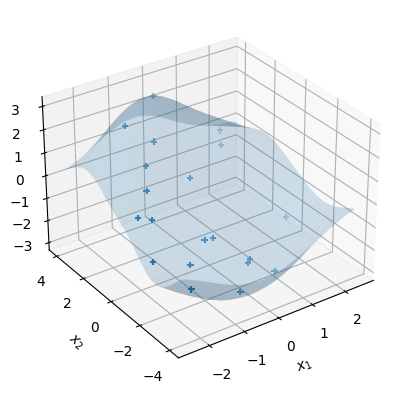

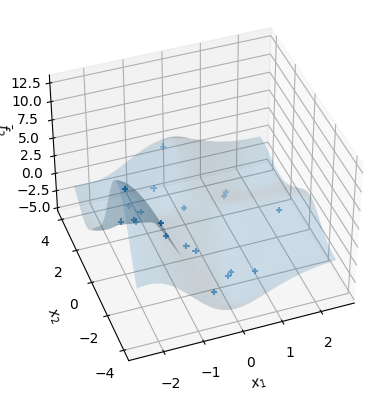

(None, None)

In [7]:
x1, x2 = np.linspace(-2.5, 2.5, 50), np.linspace(-4, 4, 50)
X1, X2 = np.meshgrid(x1, x2)
x1x2 = np.c_[np.ravel(X1), np.ravel(X2)]
kx = kernel_matrix(x1x2, x1x2_data)
zx_sol, zy_sol = kx @ c_x.value,  kx @ c_y.value

fig = plt.figure()
ax = plt.axes(projection="3d")
surf = ax.plot_surface(X1, X2, zx_sol.reshape(50, 50), alpha=0.2)
ax.scatter(x1_data, x2_data, z_data[:, 0], marker='+')
ax.set_xlabel('$x_1$'), ax.set_ylabel('$x_2$')
ax.set_zlabel(r'$\bar{f}_1$')
ax.view_init(azim=235), plt.show()

fig = plt.figure()
ax = plt.axes(projection="3d")
surf = ax.plot_surface(X1, X2, zy_sol.reshape(50, 50), alpha=0.2)
ax.scatter(x1_data, x2_data, z_data[:, 1], marker='+')
ax.set_xlabel('$x_1$'), ax.set_ylabel('$x_2$')
ax.set_zlabel(r'$\bar{f}_2$')
ax.view_init(elev=40, azim=250), plt.show()

# 7.3節

## 実践２２

In [8]:
import matplotlib.pyplot as plt, numpy as np, math
import pandas as pd

In [9]:
def kernel_func(x1, x2, i, j, hp): 
    if i == j and all(x1 == x2):
      k = hp[0]**2 + hp[2]**2
    else:
      k = hp[0]**2*math.exp(-(1/(2*hp[1]**2))*np.sum((x1-x2)**2))
    return k

def kernel_matrix(x1, x2, hyperparam):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j], i, j, hyperparam)
    return K

In [10]:
imported_data = pd.read_csv('https://www.scl.ipc.i.u-tokyo.ac.jp/kernel2/chapter7.csv')
imported_data = imported_data.values

n = 25
x1_data = imported_data[0:n, 4]
x2_data = imported_data[0:n, 5]
z_data = imported_data[0:n, 6] 
x1x2_data = np.vstack([x1_data, x2_data]).T

In [11]:
N = 30
x1 = x2 = np.linspace(-2, 2, N)
X1, X2 = np.meshgrid(x1, x2)
X1, X2 = np.meshgrid(x1, x2)
x1x2 = np.c_[np.ravel(X1), np.ravel(X2)]

In [12]:
!pip install GPy
import GPy

kernel = GPy.kern.RBF(2)
model = GPy.models.GPRegression(x1x2_data, z_data.reshape(-1, 1), kernel=kernel)

hparam_priors = 3*[None]
hparam_priors[0] = GPy.priors.Gaussian(mu=0, sigma=0.2)
hparam_priors[1] = GPy.priors.Gaussian(mu=0, sigma=0.8)
hparam_priors[2] = GPy.priors.Gaussian(mu=0, sigma=0.01)
param_name = model.parameter_names()
for i in range(3):
  hparam_priors[i].domain = "positive"
  model[param_name[i]].set_prior(hparam_priors[i])
  
model.optimize(messages=False, optimizer='scg', max_iters=1e5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPy: filename=GPy-1.10.0-cp39-cp39-linux_x86_64.whl size=3288044 sha256=528cfd8d66f7f38702bf4147c8ee4f7882966a8e7d136ed79134d198dddde7ed
  Stored in directory: /root/.cache/pip/wheels/78/fd/57/7c1e4a6f9a5380e2536af9809075ba085b1bb8d38ee84ea183
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102564 sha256=096ad5962a0c50e3c41e0d9fb2ee5a51cfe7079e111be0602dad23fc2599b1dd
  Stored in directory: /root/.cache/pip/wheels/9c/5f/9b/c4273ae8f869387214be2b99598d1b71dbf00672576cb85e74
Successfully built GPy paramz


In [13]:
sigma_f = np.sqrt(model.rbf.variance[0])
q = model.rbf.lengthscale[0]
sigma_n = np.sqrt(model.Gaussian_noise.variance[0])
hyperparam = [sigma_f, q, sigma_n]
K = kernel_matrix(x1x2_data, x1x2_data, hyperparam)
invK = np.linalg.inv(K)
K_ss = kernel_matrix(x1x2, x1x2, hyperparam)
k_s = kernel_matrix(x1x2, x1x2_data, hyperparam) 

c = invK @ z_data
z_mu = k_s @ c
z_cov = K_ss - k_s @ invK @ k_s.T
z_stdv = np.sqrt(np.diag(z_cov))

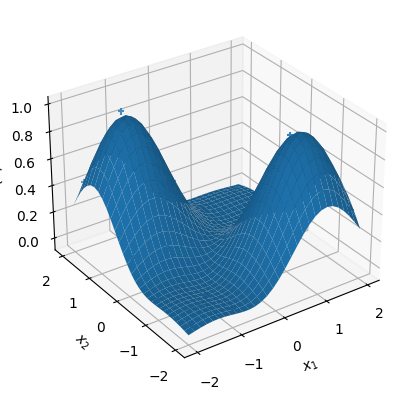

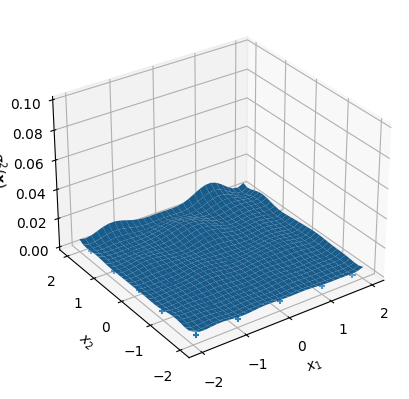

(None, None)

In [14]:
fig = plt.figure()
ax = plt.axes(projection="3d")
surf = ax.plot_surface(X1, X2, z_mu.reshape(N, N))
ax.scatter(x1_data, x2_data, z_data, marker='+')
ax.set_xlabel('$x_1$'), ax.set_ylabel('$x_2$')
ax.set_zlabel('$\mu(\mathbf{x})$')
ax.view_init(azim=235), plt.show()

fig = plt.figure()
ax = plt.axes(projection="3d")
surf = ax.plot_surface(X1, X2, z_stdv.reshape(N, N)**2)
ax.scatter(x1_data, x2_data, 0, marker='+')
ax.set_xlabel('$x_1$'), ax.set_ylabel('$x_2$')
ax.set_zlabel('$\sigma^2(\mathbf{x})$')
ax.set_zlim(0, 0.1)
ax.view_init(azim=235), plt.show()